# Mentoria de  Detección de Fraude de Tarjeta de Crédito  
## Trabajo: Análisis y visualización de datos.

En el siguiente práctico vamos a empezar a trabajar nuestro dataset haciendo uso de algunos conceptos fundamentales y otras 'herramientas' que han ido viendo a lo largo de la primer materia.  
La idea aquí es empezar a pensar en este problema como una situación que se les puede plantear en el mundo real:  
>Supongan que como científicos de datos son contradados por una consultora externa a una plataforma de compras online para que analicen los fraudes realizados con tarjeta de crédito en las transacciones dentro de la plataforma.  
Esta consultora tiene acceso a los datos de forma parcial, dado que por su caracter externo y por acuerdos de confidencialidad no pueden distribuir el detalle de las variables originales con personas ajenas a la empresa. La consultora los contrata con el objetivo de que puedan realizar su mejor trabajo con esta información parcial y dispersa.  

Así planteado, nuestro problema se subdivide entonces en una serie de problemas menores que van a marcar los objetivos de cada etapa del ciclo de vida de este proyecto. La etapa que nos compete ahora es la de la **exploración y análisis de los datos**.

### Introducción: algunos conceptos teóricos.  
Antes de empezar explorar el dataset, siempre es interesante que como científicos de datos nos adentremos en las particularidades conceptuales de los problemas que vamos a estar abordando. Dicho de otra forma, debemos conocer de qué va cada término relevante del problema, al menos, y entender las conexiones entre cada término. Es deseable que como científicos e investigadores incorporemos como buen hábito o práctica meetodológica el explicitar en lenguaje común todo cuanto sabemos de un problema específico, para ir contruyendo de forma robusta y progresiva nuestros problemas a partir de este 'marco teórico'.  


**Fraude de tarjeta de crédito**:
> Vamos a llamar fraude de tarjerta a aquellas transacciones o compras con tarjetas de crédito que han sido determinadas como fraudulentas por la paltaforma de compra (en este caso, Vesta). Las caraccterísticas que nos van a interesar aquí especialemnte son el monto de dinero y al frecuencia en el tiempo en el que pueden ocurrir. Asumimos que los pagos fraudulentos como tales son una clase homogénea (conceptualment hablando, son pagos realizados por un defraudador con una tarjeta robada) en los cuales quien recibe el pago acusa de no recibir su parte el mismo, o quien emite acusa de no haber realizado dicho pago. El fraude tiene entonces al menos tres actores:  un defraudador, un vendedor y un titular legitimo de la tarjeta.

**Monto total de transacciones**:  
> Es el total de dinero procesado en el período de tiempo analizado. Este es un concepto que interesa especialmente desde el punto de vista de negocios, dado que no toma en cuenta la cantidad de pagos sino más bien la masa total de dinero que representan.

**Monto total de fraude**:  
> Es el total de dinero procesado en el período de tiempo analizado que se perdió en fraude. Nuevamente es un concepto que interesa especialmente desde el punto de vista de negocios, dado que nos permite estimar el impacto que ha tenido en moneda.

**Porcentaje de fraude**:  
> Es el porcentaje que representa el total de dinero defraudado del total de dinero transaccionado. Esta es una de las métricas más esenciales de negocio: nos perrmite entender rápida e intuitivamente qué tan severo ha sido el impacto del fraude para el negocio. Piensen lo siguiente: como plataforma de ventas, mi ganancia está principalmente en un porcentaje quee me llevo de cada transaccción (el fee o tarifa). Si mi fee es del 3% y el total de fraude representa el 5%, desde el punto de vista de negocios el modelo no está siendo rentable.

Vamos entonces a hacer las siguientes asunciones para darle sentido a la tarea:   
  - La plataforma se hace cargo al 100% de las transacciones fraudulentas, así que un pago fraudulento es dinero que pierde la empresa;  
  - La mayor parte del fraude que vemos es de robo de tarjeta, quiere decir que ni el titular de la tarjeta ni el vendedor participan del fraude (aunque este podría ser eel caso)

### 1. Carga de datos y exploración de los tipos de datos.

Como vieron en el primer práctico, la ciencia de datos utiliza conocimientos y metodologías de distintas disciplinas. es hora de poner a prueba estos conocimientos. En el primer punto necesitamos levantar la información y disponibilizarla de manera tal de que podamos manipularla con las herramientas que tenemos. Como vieron utilizamos principalmente herramientas desarrolladas sobre un lenguaje de programación expecífico, **python**.  
La idea es que sentemos algunos conocimientos básicos de estas herramientas, que vienen en paquetes de código llamados librerías.  
Python es un lenguaje orientado a **objetos**, lo que significa que toda nuestra información quedará persistida dentro del noteboook "dentro" de una variable a la que trataremos como un objeto. La idea es explorar algunas proriedades de ese objeto, a través de lo que llamamos   **métodos y atributos**.
   1. Cargen las librerías que vamos a usar para este práctico y creen una variable para asignarle el dataset usando la librería pandas. (Recuerden que el dataset está dividido en dos partes, exploren qué métodos les da pandas para unir los dos dataset)
   2. Chequen que la información está completa y que el dataset contiene los registros y columnas que debería contener (utilicen atributos del panda dataframe para esto)
   3. Analicen los tipos de datos que posee cada columna (nuevamente utilicen herramientas de la librería pandas)
   4. El dataset ¿posee valores del tipo null?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
#1.1

# Primero ubicamos la dirección de los datasets en dos variables.
path1 = "../dataset/fraud_data_pt1.csv"
path2 = "../dataset/fraud_data_pt12.csv"

# Luego los leemos en dos dataframes independientes.
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

# Y los concatetamos en uno solo.
df = pd.concat([df1, df2])

# Corregimos el índice y borramos columnas innecesarias.
df = df.reset_index()
df.pop('index')
df.pop('Unnamed: 0')

# Veamos un poco del dataframe final:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#1.2

# Primero veamos las columnas de nuestro dataframe.
print("Las columnas de nuestro dataframe son:")
for i in range(len(df.columns)):
    print("\t",df.columns[i])
print()

print("El dataframe debería tener una longitud igual a la suma de las longitudes de los dataframes",
      "que lo componen.\n")
print("df1 tiene una longitud de",len(df1))
print("                            +")
print("df2 tiene una longitud de",len(df2))
print("                            =")
print("df tiene una longitud de ",len(df))
print("\nPor lo que parece que la carga de registros fue exitosa.")

Las columnas de nuestro dataframe son:
	 Time
	 V1
	 V2
	 V3
	 V4
	 V5
	 V6
	 V7
	 V8
	 V9
	 V10
	 V11
	 V12
	 V13
	 V14
	 V15
	 V16
	 V17
	 V18
	 V19
	 V20
	 V21
	 V22
	 V23
	 V24
	 V25
	 V26
	 V27
	 V28
	 Amount
	 Class

El dataframe debería tener una longitud igual a la suma de las longitudes de los dataframes que lo componen.

df1 tiene una longitud de 142403
                            +
df2 tiene una longitud de 142404
                            =
df tiene una longitud de  284807

Por lo que parece que la carga de registros fue exitosa.


In [4]:
#1.3 y 1.4

# Para llevar adelante estos incisos hacemos uso de un solo método del dataframe: info().
print(df.info())

print("\nTodas las columnas contienen la totalidad de los valores como no nulos."
      ,"Además, todas las columnas son numéricas. La mayoría de ellas contienen números decimales,",
      "sólo Class contiene enteros.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 2.  Exploración de los datos.

Ahora que ya tenemos nuestra muestra lista para el análisis, es hora de empeezar una exploración estadística con mayor detalle de las variables que componen la muestra. Nuevamente utilizaremos herrramientas que nos provee pandas para esto.
 1. Obtenga los estadísticos básicos (media y promedio) de cada una de las columnas. Compare estos valores entre la columna de **time** y la columna **amount**.
 2. Tomando en cuenta la columna amount y time ¿podemos decir que la distribución es simétrica en cada una de ellas? Explore esto para distintos conjuntos de valores, por ejemplo, dividiendo la variable con bines de valores de intervalos de 20 [20, 40, 80, 100, max_amount], para ver si la distribución es simétrica en alguno de los mismos.
 3. Analizando la columna class (el target). ¿Cómo describirían  la distribución de la misma? Usen un gráfico para mostrar dicha distribución.

In [5]:
#2.1

# Hacemos uso del método describe() para obtener los estadísticos básicos de nuestro dataframe.
# Aplicamos otro método, transpose(), para ordenar de una forma más legible la salida del describe().
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.170770e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.384974e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.087268e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.496494e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.572434e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.223461e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406530e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
print("La columna Time almacena en su interior el momento temporal en el que fue efectuada una compra,",
      "comenzando en cero cuando se hizo la primer compra. A simple vista con los valores que arroja el",
      "método describe() podemos sacar algunas conclusiones.")

print("\nCantidad de segundos que tiene cada cuartil:")
print("\tQ1:",round(df.describe().transpose()["25%"][0],2),", es decir, el",
      round(df.describe().transpose()["25%"][0]/df.describe().transpose()["max"][0]*100,2),"% del tiempo." )
print("\tQ2:",round(df.describe().transpose()["50%"][0]-df.describe().transpose()["25%"][0],2),
      ", es decir, el",
      round((df.describe().transpose()["50%"][0]-df.describe().transpose()["25%"][0])/df.describe().transpose()["max"][0]*100,2),"% del tiempo." )
print("\tQ3:",round(df.describe().transpose()["75%"][0]-df.describe().transpose()["50%"][0],2),
      ", es decir, el",
      round((df.describe().transpose()["75%"][0]-df.describe().transpose()["50%"][0])/df.describe().transpose()["max"][0]*100,2),"% del tiempo." )
print("\tQ4:",round(df.describe().transpose()["max"][0]-df.describe().transpose()["75%"][0],2),
      ", es decir, el",
      round((df.describe().transpose()["max"][0]-df.describe().transpose()["75%"][0])/df.describe().transpose()["max"][0]*100,2),"% del tiempo." )
print("Lo cual nos indica que las transacciones no se realizaron de manera homogenea en el tiempo sin",
      "necesidad de hacer ningún gráfico.")

La columna Time almacena en su interior el momento temporal en el que fue efectuada una compra, comenzando en cero cuando se hizo la primer compra. A simple vista con los valores que arroja el método describe() podemos sacar algunas conclusiones.

Cantidad de segundos que tiene cada cuartil:
	Q1: 54201.5 , es decir, el 31.37 % del tiempo.
	Q2: 30490.5 , es decir, el 17.65 % del tiempo.
	Q3: 54628.5 , es decir, el 31.62 % del tiempo.
	Q4: 33471.5 , es decir, el 19.37 % del tiempo.
Lo cual nos indica que las transacciones no se realizaron de manera homogenea en el tiempo sin necesidad de hacer ningún gráfico.


In [7]:
print("Respecto a la columna Amount, podemos ver algo muy interesante: mientras que su media es de",
     "aproximadamente",round(df.describe().transpose()["mean"][29],2),"el valor de Amount que es mayor al",
     "75% de los casos es", round(df.describe().transpose()["75%"][29],2),". Lo cual nos dice que los valores",
     "más elevados de esta columna hacen que la media no sea representativa del conjunto.")

Respecto a la columna Amount, podemos ver algo muy interesante: mientras que su media es de aproximadamente 88.35 el valor de Amount que es mayor al 75% de los casos es 77.16 . Lo cual nos dice que los valores más elevados de esta columna hacen que la media no sea representativa del conjunto.


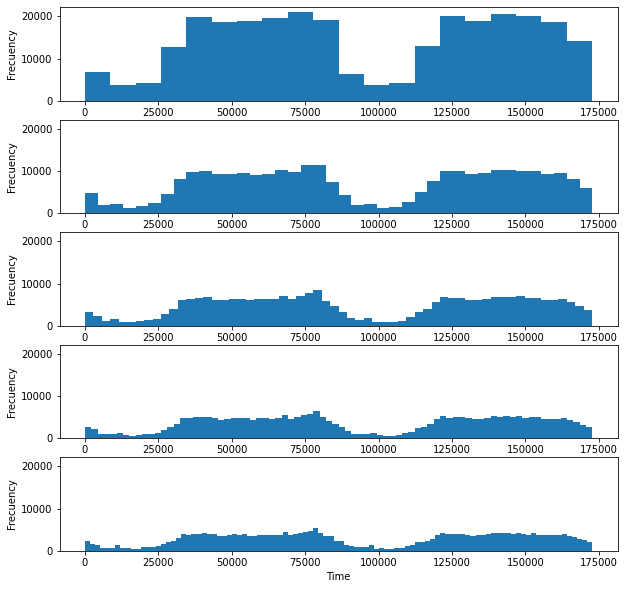

Se puede ver en los histogramas, para todo número de bins probados (20, 40, 50, 80 y 100), que la distribución de las transacciones en el tiempo no es uniforme.


In [8]:
#2.2

# Ploteo de los histogramas de la columna Time con diferente cantidad de bins.
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,sharey=True,figsize=(10,10))
ax1.hist(df.Time,bins=20)
ax1.set(ylabel="Frecuency")
ax2.hist(df.Time,bins=40)
ax2.set(ylabel="Frecuency")
ax3.hist(df.Time,bins=60)
ax3.set(ylabel="Frecuency")
ax4.hist(df.Time,bins=80)
ax4.set(ylabel="Frecuency")
ax5.hist(df.Time,bins=100)
ax5.set(ylabel="Frecuency",xlabel="Time")
plt.show()

print("Se puede ver en los histogramas, para todo número de bins probados (20, 40, 50, 80 y 100),",
      "que la distribución de las transacciones en el tiempo no es uniforme.")

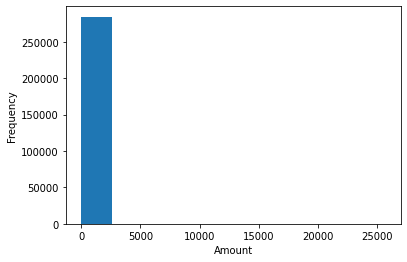

El histograma de la columna Amount es raro, queda desproporcionado por algunos outliers. Vamos a eliminar los valores extremos para que no nos distorcione esta visualización.


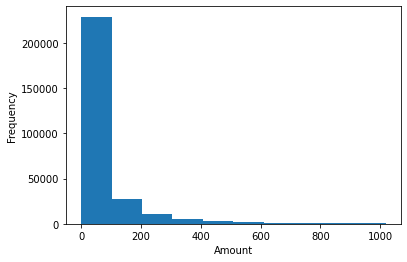

Ahora que está más uniforme variemos la cantidad de bines.


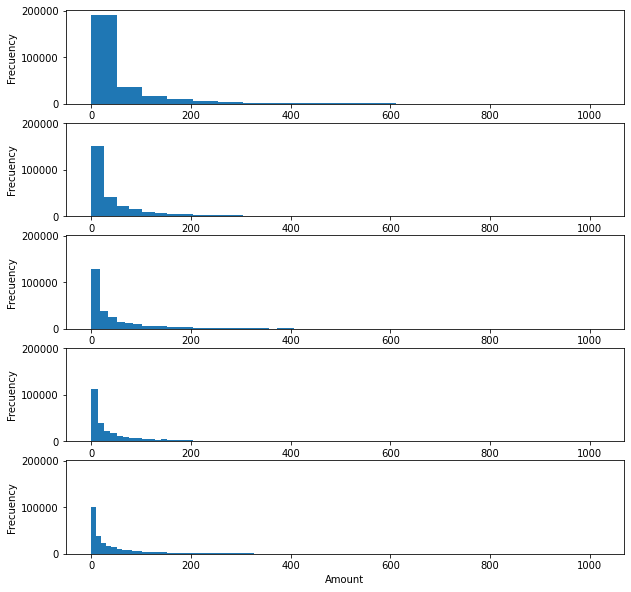

Se puede observar que hay una gran mayoría de las transacciones con transacciones menores a 200.


In [9]:
# Ploteo del histograma de la columna Amount.
plt.hist(df.Amount)
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

print("El histograma de la columna Amount es raro, queda desproporcionado por algunos outliers.",
     "Vamos a eliminar los valores extremos para que no nos distorcione esta visualización.")

# Removemos las transacciones pertenecientes al 1% más grande.
df_New = df[df["Amount"] < df["Amount"].quantile(99/100)]

# Ploteo del histograma de la columna Amount sin outliers.
plt.hist(df_New.Amount)
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

print("Ahora que está más uniforme variemos la cantidad de bines.")

# Ploteo de los histogramas de la columna Time con diferente cantidad de bins.
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,sharey=True,figsize=(10,10))
ax1.hist(df_New.Amount,bins=20)
ax1.set(ylabel="Frecuency")
ax2.hist(df_New.Amount,bins=40)
ax2.set(ylabel="Frecuency")
ax3.hist(df_New.Amount,bins=60)
ax3.set(ylabel="Frecuency")
ax4.hist(df_New.Amount,bins=80)
ax4.set(ylabel="Frecuency")
ax5.hist(df_New.Amount,bins=100)
ax5.set(ylabel="Frecuency",xlabel="Amount")
plt.show()

print("Se puede observar que hay una gran mayoría de las transacciones con transacciones menores a 200.")

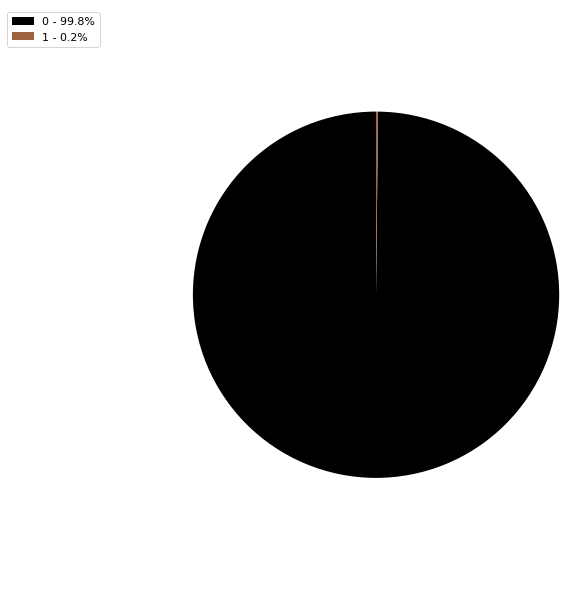

Tan solo el 0.2% de los casos es fraudulento. Es un dataset desbalanceado.


In [19]:
#2.3

# Para ver la distribución de la clase Class hagamos primero un gráfico de torta. 
Classes = df_New.Class.value_counts().reset_index().rename(columns={'index': 'Class', 'Class': 'Frequency'})

#sizes = top25_normalized['frequency']
#labels = top25_normalized['language']
frequency = Classes.Frequency
labels= Classes.Class

fig1, ax1 = plt.subplots(figsize=(8, 8))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('copper')
ax1.set_prop_cycle("color", [theme(1. * i / len(frequency))
                                 for i in range(len(frequency))])

_, _ = ax1.pie(frequency, startangle=90, radius=1800)
 
ax1.axis('equal')
 
total = sum(frequency)
plt.legend(
    loc='upper left',
    labels=['%s - %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, frequency)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

print("Tan solo el 0.2% de los casos es fraudulento. Es un dataset desbalanceado.")

### 3. Gráficos comparativos y a lo largo del tiempo 

Una vez que ya hicimos esta visualización general de los datos de cada columna, es hora de empezar a buscar características específicas dentro de cada columna en relación a la clase que queremos encontrar: los pagos fraudulentos. 
Sin duda que un análisis exploratorio debe arrojar buenas intuiciones sobre el problema que queremos abordar eespecíficamente. Así que una práctica interesante es tomar como pivot (eje) a cada una de las clases y comparar los comportamientos de las mismas dadas las mismas variables.
1. Separar los pagos usando las dos clases. Elijan un tipo de tratamiento para los datos (pueden quitar outliers utilizando alguno de los criterios vistos en clase para limpiar valores extremos). Grafiquen en un boxenplot la distribución de estas dos clases en función de la variable **amount**. Para graficar los pagos no fraudulentos, por el tamaño de la muestra original, pueden usar una submuestra (pueden tomar por ejemplo una muestra aleatoria del 10% de los pagos o menos).
2. ¿Qué conclusiones pueden observar de los gráficos anteriores? ¿Los pagos entre las dos clases se distribuyen de la misma manera? ¿Qué pueden observar en relación a la media y la mediana? Por ejemplo, en el percentil 75, ¿tenemos el mismo monto tanto en ambas clases? Pueden usar el concepto de cauntil y percentil para justificar sus obersvaciones.
3. Grafiquen la distribución de los pagos positivos y negativos utilizando la variable **time**. En relación a dicha variable ¿cómo vemos que es la distribución de pagos fraudulentos y normales a lo largo del tiempo? A su criterio, esta variable ¿nos permite encontrar algún patrón dentro de la población? 

### 4. Algunas consideraciones de negocios. 
Supongamos ahora que sus contrapartes de negocios del la entidad financiera quieren entender algunas particularidades de estos pagos fraudulentos. Utilicemos algunos de los conceptos que definimos anterioremente para poder trasmitir algunas características sencillas de la clase fradulenta de pagos.
1. Presenten el monto total de fraude versus el monto total de transacciones. ¿Cuál es el porcentaje de fraude para este dataset?
2. Sus contrapartes de negocios quieren saber ahora cómo se comporta el fraude en relación al monto. Separando el monto de dinero en intervalos de dinero de [0-10] llamado montos bajos, de [10-30] como montos intermedios-bajos, [30-50] como montos intermedios-altos, y [+50] como montos altos, expliciten en cuál de ellos se encuentra concentrado la mayoría de las instancias fraude y en cual de ellos se concentra la mayor cantidad de dinero perdido por fraude. Estas dos medidas, ¿coinciden? ¿Podemos decir si pensamos de esta forma el problema que la mayor pérdida de dinero se da necesariamente allí donde hay mayor cantidad de fraude?  